In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Path to sample raw data
censusPath = '2018 Edu Att Raw Data Revised.csv'

# Path to IRS AGI data
zipStatesPath = 'Zips States Data.csv'

# read CSV files
census_df = pd.read_csv(censusPath, usecols=["ZIPCODE", "Score"], dtype={"ZIPCODE":np.int32,"Score":np.float32})
zipStates_df = pd.read_csv(zipStatesPath, dtype={"ZIPCODE":np.int32,"STATE":'category'})

df = census_df.merge(zipStates_df, on = 'ZIPCODE')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16351 entries, 0 to 16350
Data columns (total 3 columns):
ZIPCODE    16351 non-null int32
Score      16351 non-null float32
STATE      16351 non-null category
dtypes: category(1), float32(1), int32(1)
memory usage: 274.4 KB


Text(0, 0.5, 'Frequency')

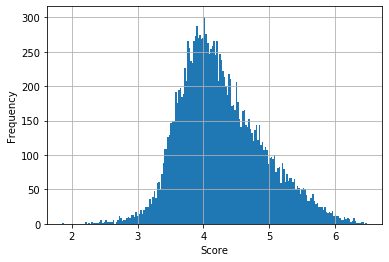

In [2]:
df.Score.hist(bins=200)
plt.xlabel('Score')
plt.ylabel('Frequency')

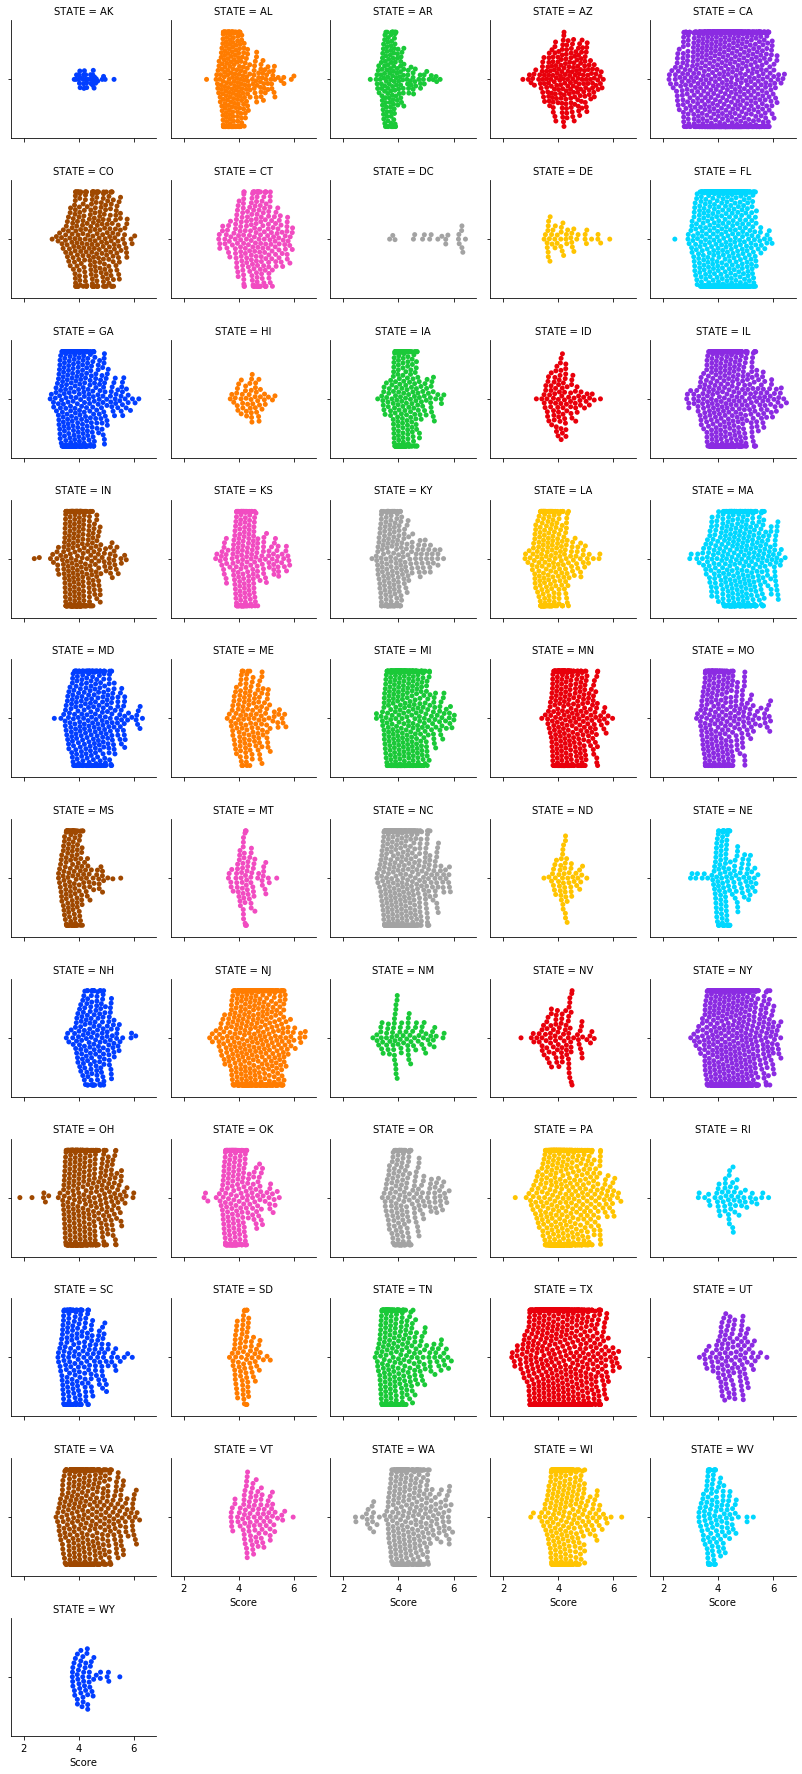

In [3]:
# Create histograms for score data aggregated by State (takes about 5 minutes to load)

histGrid = sns.FacetGrid(df, col = 'STATE', col_wrap = 5, height = 2.25, hue='STATE', palette = 'bright')
histGrid = histGrid.map(sns.swarmplot,'Score',order=list(df.STATE.unique())).set_axis_labels("Score")